<a href="https://colab.research.google.com/github/agbaigwe/Bank-Churn-prediction-model/blob/main/bankchurnanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
import numpy as np

%matplotlib inline

In [164]:
Bka = pd.read_excel('/content/Bank dataset.xlsx')

In [165]:

Bka.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [166]:
Bka.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [167]:

Bka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [168]:
Bka.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [169]:
Bka.shape

(10000, 13)

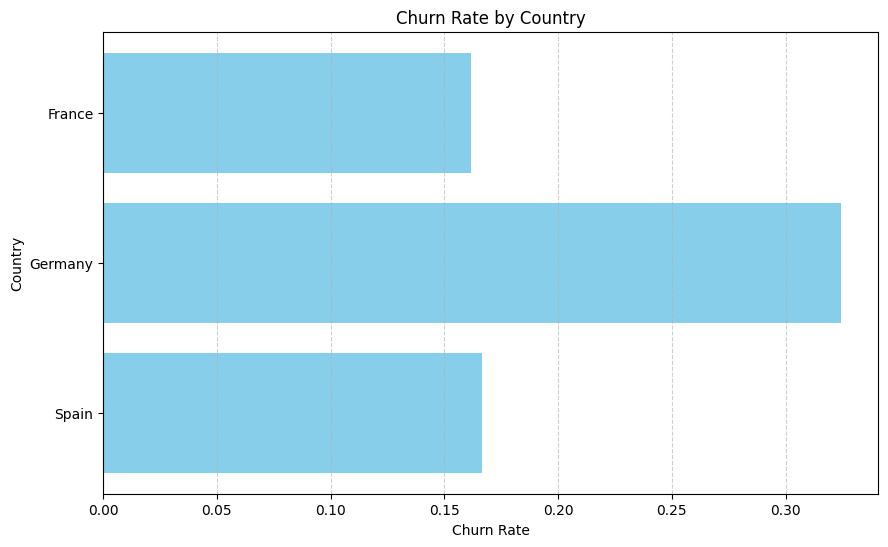

In [170]:
# prompt: i need a lbar chart so i can see then churn by country

# Assuming 'Bka' DataFrame is already loaded and available.
# Group by country and calculate the churn rate
churn_by_country = Bka.groupby('Geography')['Exited'].mean().reset_index()

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(churn_by_country['Geography'], churn_by_country['Exited'], color='skyblue')
plt.xlabel('Churn Rate')
plt.ylabel('Country')
plt.title('Churn Rate by Country')
plt.gca().invert_yaxis()  # Invert y-axis to show highest churn at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


<ipython-input-171-3a4985688f91>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = Bka.groupby('Age_Group')['Exited'].mean().reset_index()


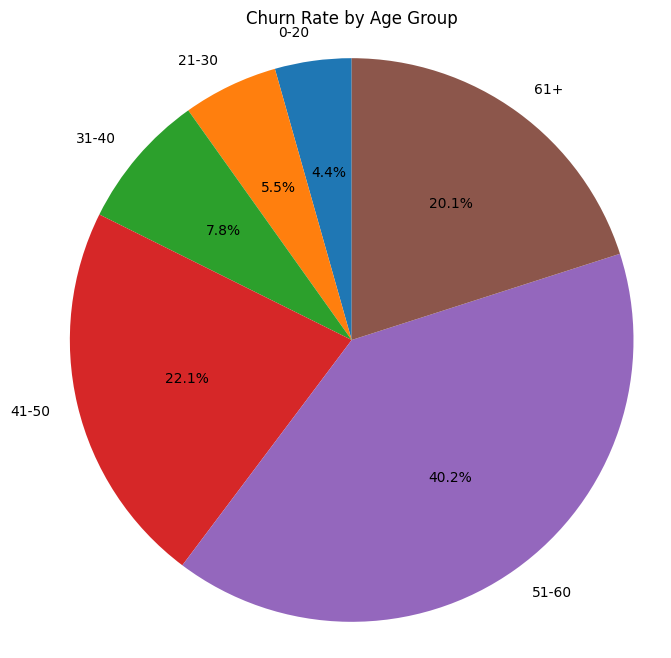

In [171]:
# prompt: Generate churn pie chat by age group put the value on each bars

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Bka' DataFrame is already loaded and available.

# Group by age group and calculate the churn rate
# Define age groups (you can customize these)
bins = [0, 20, 30, 40, 50, 60, 100]  # Example age bins
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
Bka['Age_Group'] = pd.cut(Bka['Age'], bins=bins, labels=labels, right=False)

churn_by_age = Bka.groupby('Age_Group')['Exited'].mean().reset_index()


# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_by_age['Exited'], labels=churn_by_age['Age_Group'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


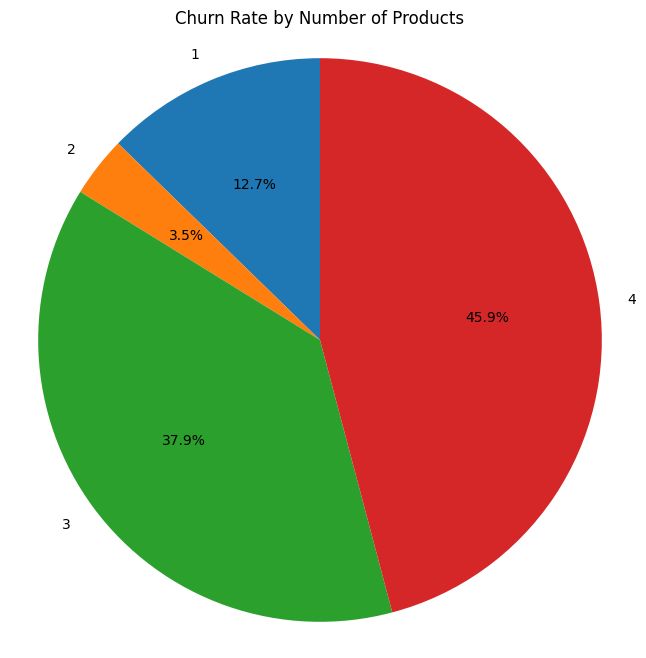

In [172]:
# prompt: generate churn pie chat by number of products.

# Assuming 'Bka' DataFrame is already loaded and available.

# Group by the number of products and calculate the churn rate
churn_by_products = Bka.groupby('NumOfProducts')['Exited'].mean().reset_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_by_products['Exited'], labels=churn_by_products['NumOfProducts'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate by Number of Products')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


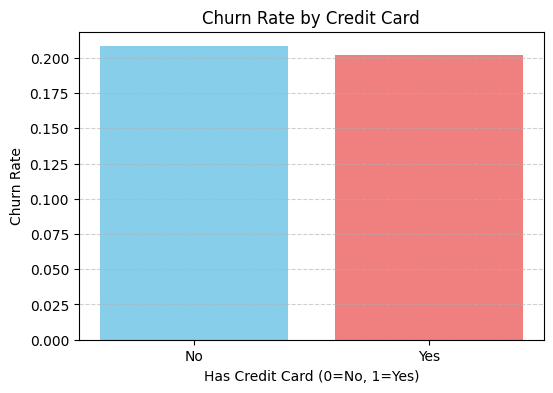

In [173]:
# prompt: generate churn chat by creditcard

# Assuming 'Bka' DataFrame is already loaded and available.

# Group by credit card and calculate the churn rate
churn_by_card = Bka.groupby('HasCrCard')['Exited'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(churn_by_card['HasCrCard'], churn_by_card['Exited'], color=['skyblue', 'lightcoral'])
plt.xlabel('Has Credit Card (0=No, 1=Yes)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Credit Card')
plt.xticks([0,1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


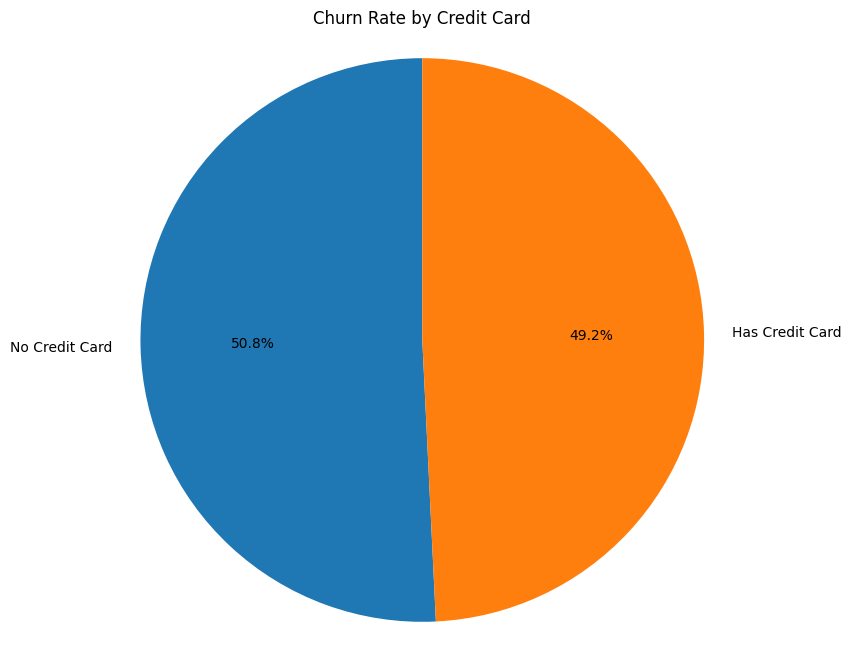

In [174]:
# prompt: generate churn pie chat by creditcard

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Bka' DataFrame is already loaded and available.

# Group by credit card and calculate the churn rate
churn_by_card = Bka.groupby('HasCrCard')['Exited'].mean().reset_index()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(churn_by_card['Exited'], labels=['No Credit Card', 'Has Credit Card'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Rate by Credit Card')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


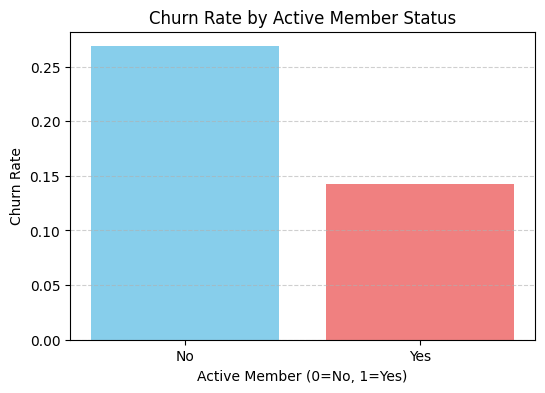

In [175]:
# prompt: generate churn chat by active member

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Bka' DataFrame is already loaded and available.

# Group by active member status and calculate the churn rate
churn_by_active_member = Bka.groupby('IsActiveMember')['Exited'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(churn_by_active_member['IsActiveMember'], churn_by_active_member['Exited'], color=['skyblue', 'lightcoral'])
plt.xlabel('Active Member (0=No, 1=Yes)')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Active Member Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


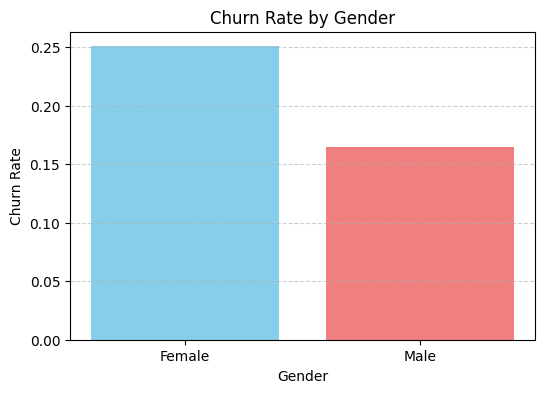

In [176]:
# prompt: generate churn chat by gender

# Assuming 'Bka' DataFrame is already loaded and available.

# Group by gender and calculate the churn rate
churn_by_gender = Bka.groupby('Gender')['Exited'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(6, 4))
plt.bar(churn_by_gender['Gender'], churn_by_gender['Exited'], color=['skyblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<ipython-input-177-f0ddff0d2517>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_creditscore = Bka.groupby('CreditScoreCategory')['Exited'].mean().reset_index()


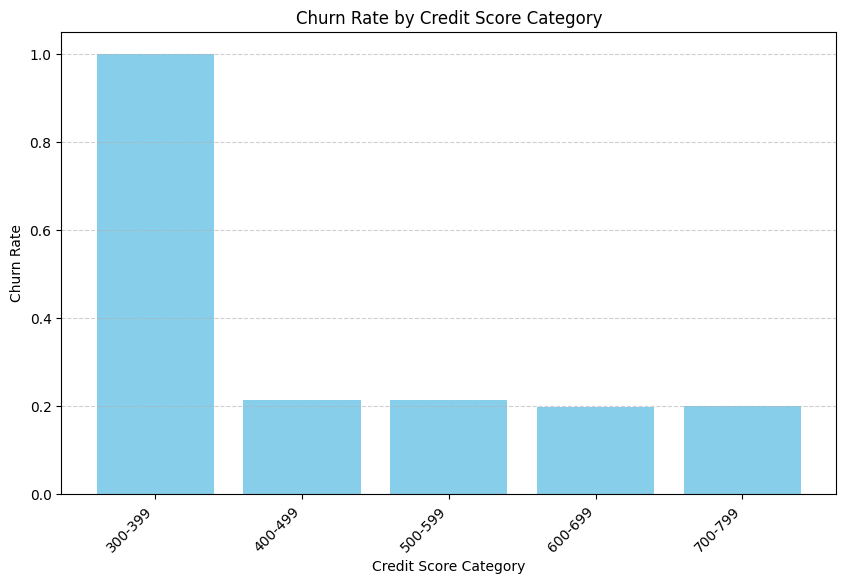

<ipython-input-177-f0ddff0d2517>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_creditscore_binary = Bka.groupby('CreditScoreCategory')['Churn_Binary'].mean().reset_index()


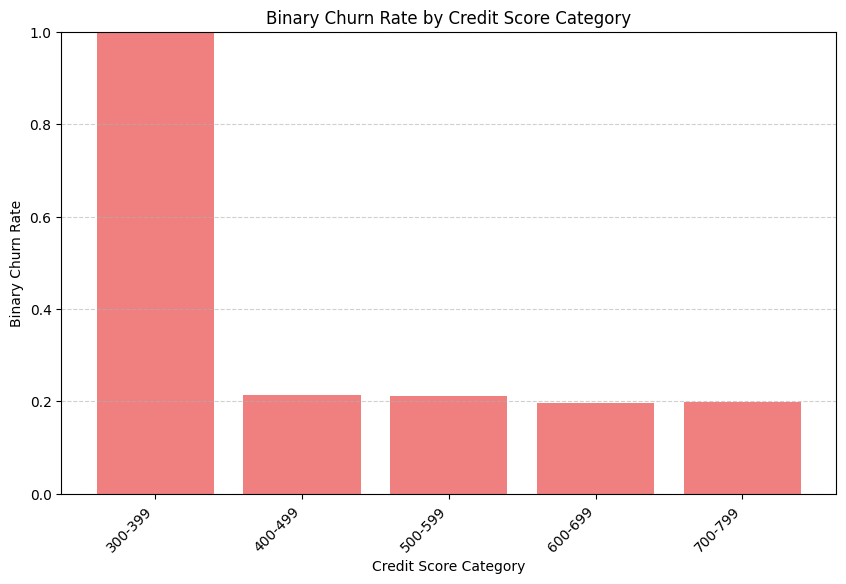

In [177]:
# prompt: generate churn chat by creditscore make the churn axis only 0 and 1

# Assuming 'Bka' DataFrame is already loaded and available.

# Group by credit score and calculate the churn rate
# Convert CreditScore to categories for better visualization
Bka['CreditScoreCategory'] = pd.cut(Bka['CreditScore'], bins=range(300, 900, 100), right=False, labels=[f'{i}-{i+99}' for i in range(300,800,100)])

churn_by_creditscore = Bka.groupby('CreditScoreCategory')['Exited'].mean().reset_index()


# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(churn_by_creditscore['CreditScoreCategory'], churn_by_creditscore['Exited'], color='skyblue')
plt.xlabel('Credit Score Category')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Credit Score Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#Further analysis -  creating a binary churn variable based on a threshold.
#Example: if churn rate is above 0.2, then assign churn = 1; else 0
threshold = 0.2
Bka['Churn_Binary'] = np.where(Bka['Exited'] > threshold, 1, 0)


# Group by CreditScoreCategory and calculate the churn rate (binary)
churn_by_creditscore_binary = Bka.groupby('CreditScoreCategory')['Churn_Binary'].mean().reset_index()

# Create the bar chart for binary churn
plt.figure(figsize=(10, 6))
plt.bar(churn_by_creditscore_binary['CreditScoreCategory'], churn_by_creditscore_binary['Churn_Binary'], color='lightcoral')
plt.xlabel('Credit Score Category')
plt.ylabel('Binary Churn Rate') # Y-axis label changed for clarity
plt.title('Binary Churn Rate by Credit Score Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.show()



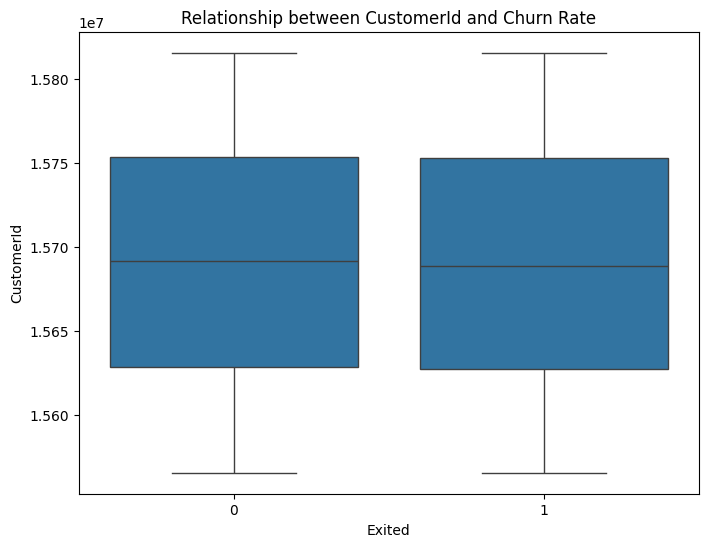

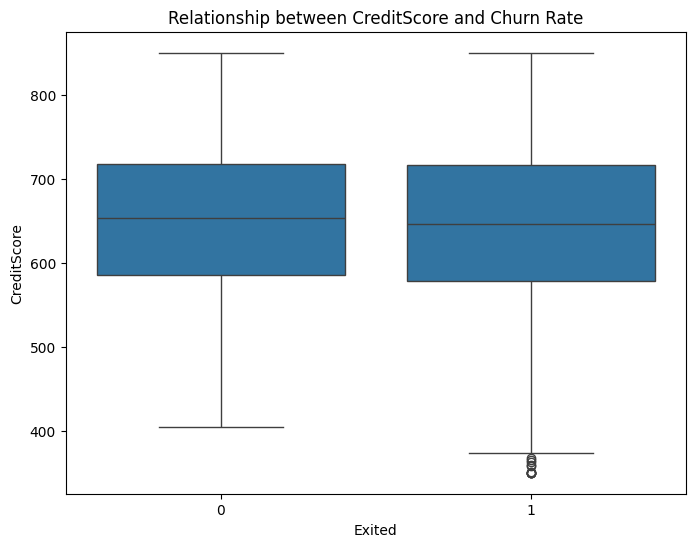

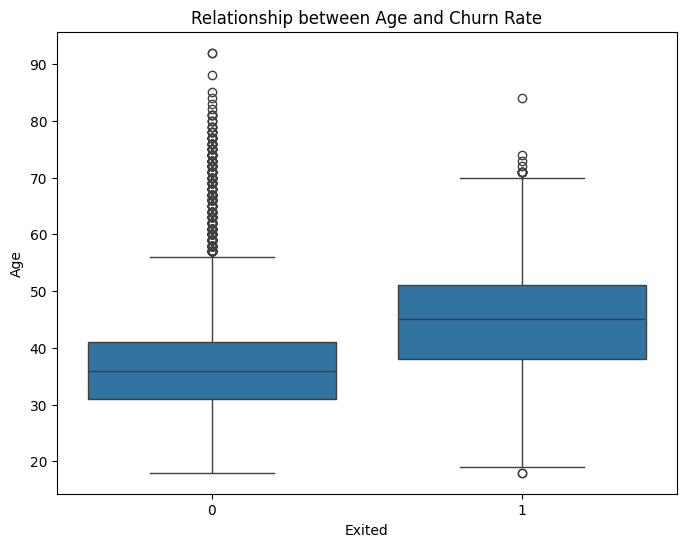

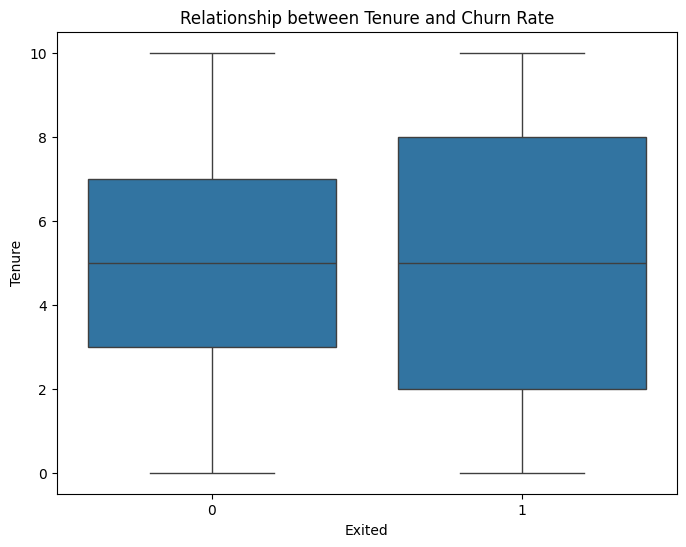

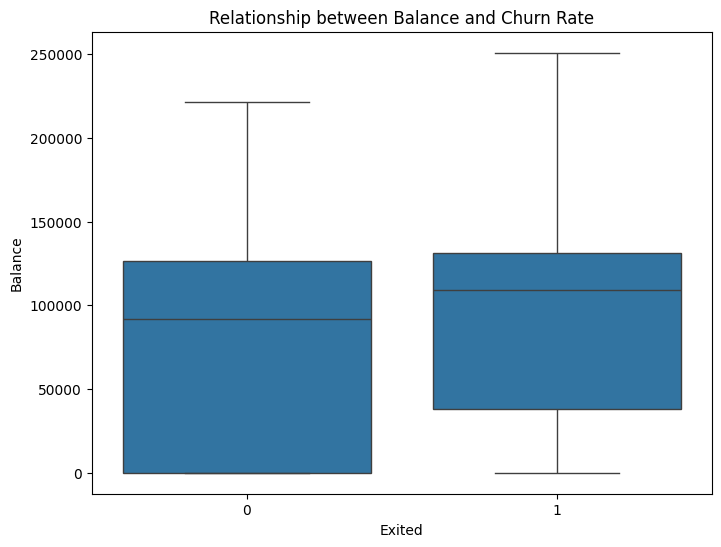

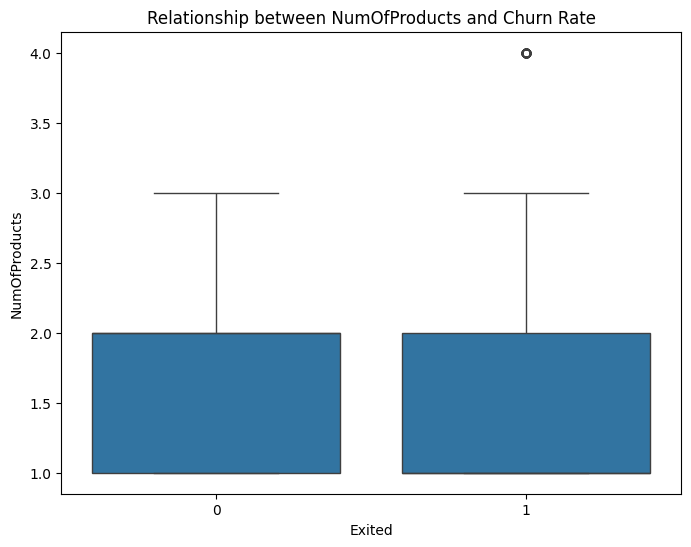

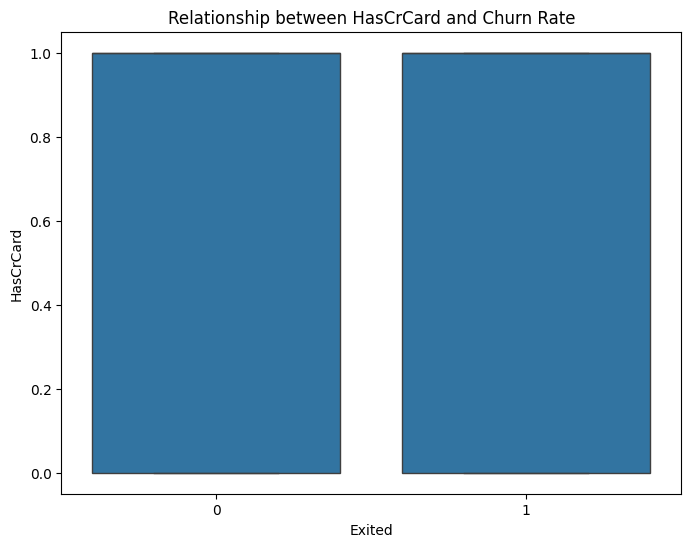

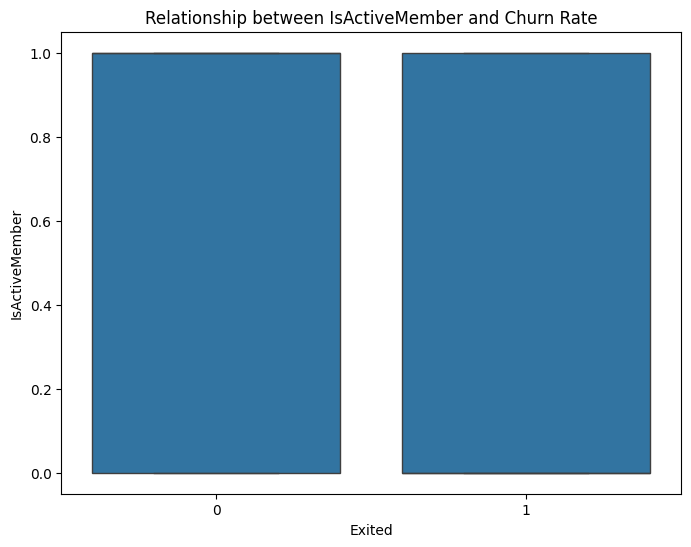

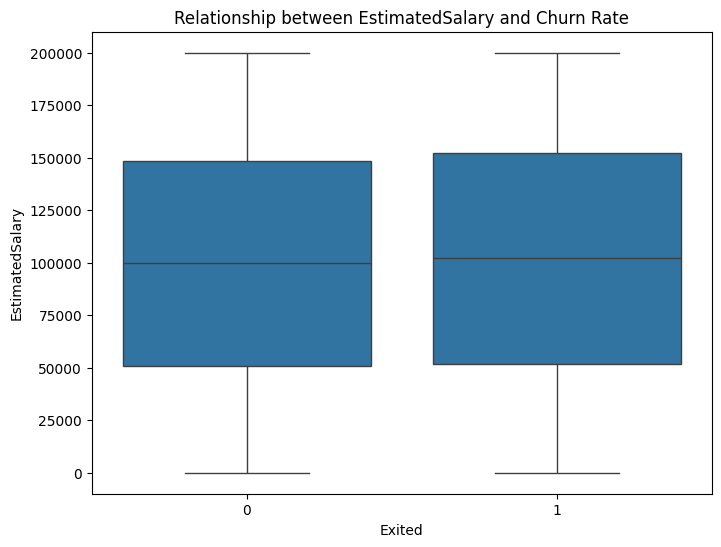

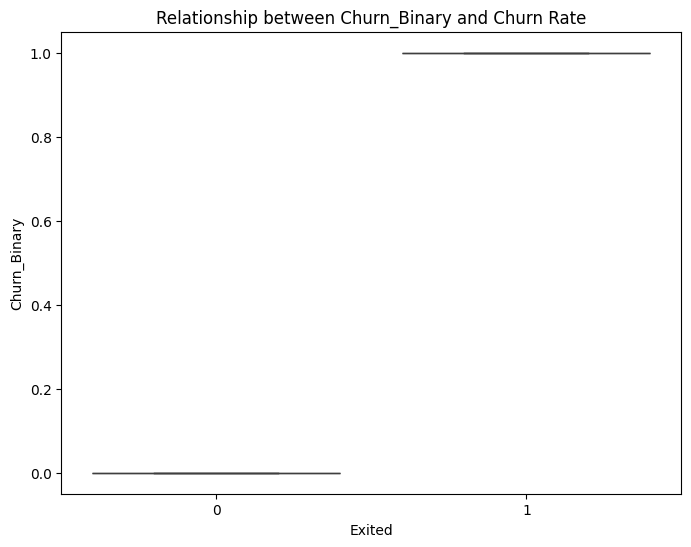

In [178]:
# prompt: show the relationship of all numeric column with the churn rate

# Assuming 'Bka' DataFrame is already loaded and available.

numeric_cols = Bka.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop('Exited') #drop churn rate as it is not a predictor

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sb.boxplot(x='Exited', y=col, data=Bka)
    plt.title(f'Relationship between {col} and Churn Rate')
    plt.show()


In [179]:
Bka.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Age_Group', 'CreditScoreCategory',
       'Churn_Binary'],
      dtype='object')

In [180]:
Bkac = Bka.drop(['CustomerId','Surname'], axis = 1)

In [181]:

Bkae = pd.get_dummies(Bkac, columns=['Geography', 'Gender'], drop_first=True)

Bkae[['Geography_Spain','Geography_Germany', 'Gender_Male']] = Bkae[['Geography_Spain','Geography_Germany', 'Gender_Male']].astype(int)

In [182]:
#Bkae = Bkae.drop(['Gender_Encoded','Geography_Encoded'], axis = 1)

In [183]:
Bkae.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group,CreditScoreCategory,Churn_Binary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,41-50,600-699,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,41-50,600-699,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,41-50,500-599,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,31-40,600-699,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,41-50,NaN,0,0,1,0


In [184]:
# prompt: Using dataframe Bkae: drop the following colunms age_group,creditscorecategetory,churn_binary

# Drop the specified columns from the DataFrame.
Bkae = Bkae.drop(columns=['Age_Group', 'CreditScoreCategory', 'Churn_Binary'])
# Print the updated DataFrame to verify changes.
print(Bkae.head())


   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1                  0   
1               1        112542.58       0                  0   
2               0        113931.57       1                  0   
3               0         93826.63       0                  0   
4               1         79084.10       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            

In [185]:
Bkae.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Handling **imbalance**

In [186]:
Bkae['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

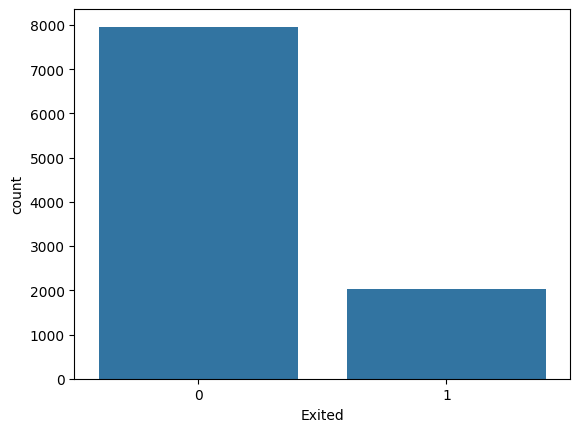

In [187]:
sb.countplot(x='Exited', data=Bkae)

In [188]:
X = Bkae.drop('Exited', axis=1)
y = Bkae['Exited']

In [189]:
from imblearn.over_sampling import SMOTE

In [190]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [191]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [192]:
# Step 1: Check for NaN values
print("NaN values in X:\n", X.isnull().sum())
print("NaN values in y:\n", y.isnull().sum())

NaN values in X:
 CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64
NaN values in y:
 0


In [193]:
X_rs,y_rs = SMOTE().fit_resample(X,y)

In [194]:
y_rs.value_counts()

,count
Exited,
1,7963
0,7963


**Training** and **testing**

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.2, random_state=42)

**Feature** **Scaling**

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
sc = StandardScaler()

In [199]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [200]:
X_train

array([[-1.69939504,  0.10082537,  0.06843476, ..., -0.56961566,
        -0.46662661, -0.84948315],
       [ 1.09282769,  0.10082537, -1.40367807, ..., -0.56961566,
        -0.46662661,  1.17718639],
       [ 0.83003026,  1.00491837, -0.29959345, ...,  1.75556971,
        -0.46662661, -0.84948315],
       ...,
       [ 0.19493646,  0.20128015,  1.17251938, ..., -0.56961566,
        -0.46662661,  1.17718639],
       [-0.70295477,  0.20128015,  0.06843476, ..., -0.56961566,
        -0.46662661, -0.84948315],
       [ 0.52343325,  1.00491837, -1.40367807, ...,  1.75556971,
        -0.46662661,  1.17718639]])

**Logistic regression**

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
lr = LogisticRegression()

In [203]:
lr.fit(X_train, y_train)

LogisticRegression()

In [204]:
y_pd = lr.predict(X_test)

In [205]:
from sklearn.metrics import accuracy_score

In [206]:
accuracy_score(y_test, y_pd)

0.788135593220339

In [207]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [208]:
precision_score(y_test, y_pd)

0.774375

In [209]:
recall_score(y_test, y_pd)

0.7978106889890535

In [210]:
f1_score(y_test, y_pd)

0.7859181731684111

**SVC**

In [211]:
from sklearn import svm

In [212]:
sm = svm.SVC()

In [213]:
sm.fit(X_train, y_train)

SVC()

In [214]:
y_pd1 = sm.predict(X_test)

In [215]:
accuracy_score(y_test, y_pd1)

0.8452605147520402

In [216]:
precision_score(y_test, y_pd1)

0.8337531486146096

In [217]:
recall_score(y_test, y_pd1)

0.8525434642627173

In [218]:
f1_score(y_test, y_pd1)

0.8430436166825852

**Kneigbours** **classifyer**

In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [220]:
kn = KNeighborsClassifier()

In [221]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [222]:
y_pd2 = kn.predict(X_test)

In [223]:
accuracy_score(y_test, y_pd2)

0.8254865034526051

In [224]:
precision_score(y_test, y_pd2)

0.8056407112201104

In [225]:
recall_score(y_test, y_pd2)

0.8461043142305216

In [226]:
f1_score(y_test, y_pd2)

0.8253768844221105

**Decision** **Tree** **Classifier**

In [227]:
from sklearn.tree import DecisionTreeClassifier

In [228]:
dt = DecisionTreeClassifier()

In [229]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [230]:
y_pd3 = kn.predict(X_test)

In [231]:
accuracy_score(y_test, y_pd3)

0.8254865034526051

In [232]:
precision_score(y_test, y_pd3)

0.8056407112201104

In [233]:
recall_score(y_test, y_pd3)

0.8461043142305216

In [234]:
f1_score(y_test, y_pd3)

0.8253768844221105

**Random** **Forest** **Classifier**

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
rf = RandomForestClassifier()

In [237]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [238]:
y_pd4 = rf.predict(X_test)

In [239]:
accuracy_score(y_test, y_pd4)

0.867231638418079

In [240]:
precision_score(y_test, y_pd4)

0.8544542032622334

In [241]:
recall_score(y_test, y_pd4)

0.8770122343850612

In [242]:
f1_score(y_test, y_pd4)

0.86558627264061

**Gradient** **Boosting** **Classifier**

In [243]:
from sklearn.ensemble import GradientBoostingClassifier

In [244]:
gb = GradientBoostingClassifier()

In [245]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [246]:
y_pd5 = rf.predict(X_test)

In [247]:
accuracy_score(y_test, y_pd5)

0.867231638418079

In [248]:
precision_score(y_test, y_pd5)

0.8544542032622334

In [249]:
recall_score(y_test, y_pd5)

0.8770122343850612

In [250]:
f1_score(y_test, y_pd5)

0.86558627264061

**Comparing** **The** **Best** **Model**

In [251]:
Final_data = pd.DataFrame({
    'Models': ['lr', 'sm', 'kn', 'dt', 'rf', 'gb'],  # Only 5 models to match 5 accuracy scores
    'ACC': [
        accuracy_score(y_test, y_pd),
        accuracy_score(y_test, y_pd1),
        accuracy_score(y_test, y_pd2),
        accuracy_score(y_test, y_pd3),
        accuracy_score(y_test, y_pd4),
        accuracy_score(y_test, y_pd5)
    ]
})


In [252]:
Final_data

,Models,ACC
0,lr,0.788136
1,sm,0.845261
2,kn,0.825487
3,dt,0.825487
4,rf,0.867232
5,gb,0.867232


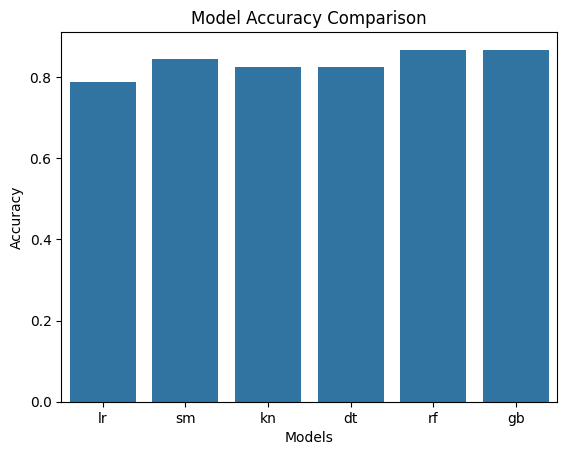

In [253]:
# Create the bar plot
sb.barplot(x='Models', y='ACC', data=Final_data)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Display the plot
plt.show()

In [254]:
Final_data1 = pd.DataFrame({
    'Models': ['lr', 'sm', 'kn', 'dt', 'rf', 'gb'],  # Only 5 models to match 5 accuracy scores
    'PRE': [
        precision_score(y_test, y_pd),
       precision_score(y_test, y_pd1),
        precision_score(y_test, y_pd2),
        precision_score(y_test, y_pd3),
      precision_score(y_test, y_pd4),
        precision_score(y_test, y_pd5)]})

In [255]:
Final_data1

,Models,PRE
0,lr,0.774375
1,sm,0.833753
2,kn,0.805641
3,dt,0.805641
4,rf,0.854454
5,gb,0.854454


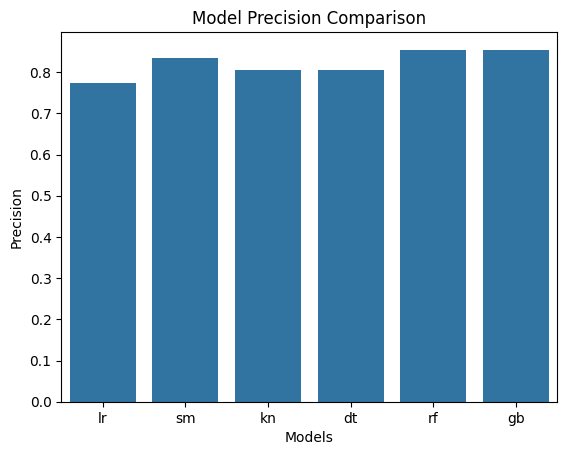

In [256]:
# Create the bar plot
sb.barplot(x='Models', y='PRE', data=Final_data1)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Precision Comparison')

# Display the plot
plt.show()

In [257]:
Final_data2 = pd.DataFrame({
    'Models': ['lr', 'sm', 'kn', 'dt', 'rf', 'gb'],  # Only 5 models to match 5 accuracy scores
    'Recall': [
        recall_score(y_test, y_pd),
       recall_score(y_test, y_pd1),
        recall_score(y_test, y_pd2),
        recall_score(y_test, y_pd3),
      recall_score(y_test, y_pd4),
        recall_score(y_test, y_pd5)]})

In [258]:
Final_data2

,Models,Recall
0,lr,0.797811
1,sm,0.852543
2,kn,0.846104
3,dt,0.846104
4,rf,0.877012
5,gb,0.877012


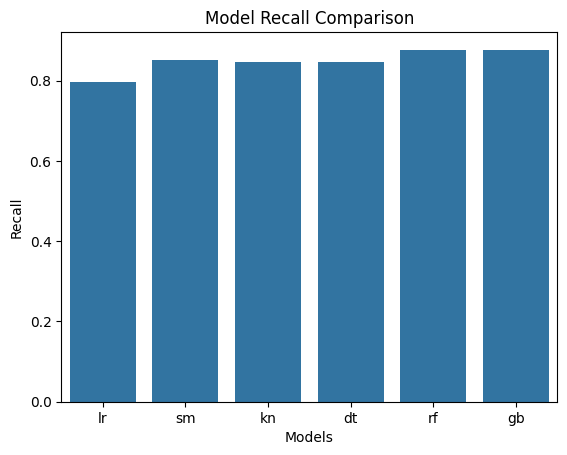

In [259]:
# Create the bar plot
sb.barplot(x='Models', y='Recall', data=Final_data2)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Model Recall Comparison')

# Display the plot
plt.show()

In [260]:
Final_data3 = pd.DataFrame({
    'Models': ['lr', 'sm', 'kn', 'dt', 'rf', 'gb'],  # Only 5 models to match 5 accuracy scores
    'F1_score': [
        f1_score(y_test, y_pd),
       f1_score(y_test, y_pd1),
        f1_score(y_test, y_pd2),
        f1_score(y_test, y_pd3),
      f1_score(y_test, y_pd4),
        f1_score(y_test, y_pd5)]})

In [261]:
Final_data3

,Models,F1_score
0,lr,0.785918
1,sm,0.843044
2,kn,0.825377
3,dt,0.825377
4,rf,0.865586
5,gb,0.865586


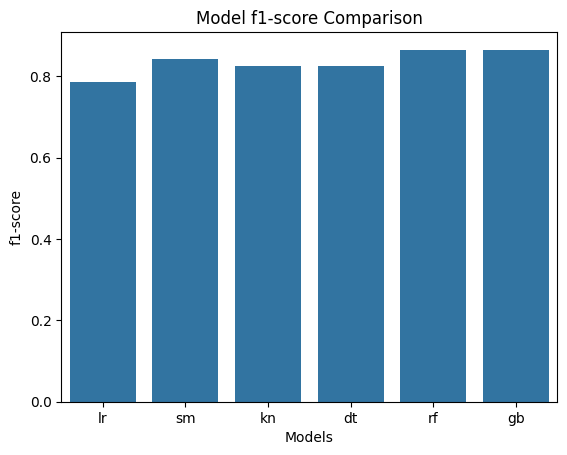

In [262]:
# Create the bar plot
sb.barplot(x='Models', y='F1_score', data=Final_data3)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('f1-score')
plt.title('Model f1-score Comparison')

# Display the plot
plt.show()

**Save** **The** **Model**

In [263]:
X_rs = sc.fit_transform(X_rs)

In [264]:
rf.fit(X_rs, y_rs)

RandomForestClassifier()

In [265]:
import joblib

In [266]:
joblib.dump(rf, 'churn_predict_model')

['churn_predict_model']

In [267]:
model = joblib.load('churn_predict_model')

In [268]:
Bkae.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [269]:
# Your input data as a 1D array
input_data = np.array([772, 42, 3, 75075.31, 2, 1, 0, 92888.52, 1, 0, 1])

# Reshape the input data into a 2D array
input_data_2d = input_data.reshape(1, -1)

# Now pass the reshaped data to the model
prediction = model.predict(input_data_2d)

print(prediction)

[1]


In [270]:
# prompt: create a gui for the above do the data can be entered one after the other

import ipywidgets as widgets
from IPython.display import display, clear_output

# ... (your existing code) ...

# Function to handle button click
def on_button_clicked(b):
    clear_output(wait=True)  # Clear previous output
    display(input_widgets) # Redisplay input widgets

    try:
        input_data = [
            float(credit_score.value),
            float(age.value),
            float(tenure.value),
            float(balance.value),
            float(num_products.value),
            float(has_cr_card.value),
            float(is_active_member.value),
            float(estimated_salary.value),
            float(geography_germany.value),
            float(geography_spain.value),
            float(gender_male.value)
        ]

        input_data_2d = np.array(input_data).reshape(1, -1)
        prediction = model.predict(input_data_2d)
        print(f"Prediction: {prediction[0]}")
    except ValueError:
        print("Invalid input. Please enter numeric values.")


# Create input widgets
credit_score = widgets.Text(description='Credit Score:')
age = widgets.Text(description='Age:')
tenure = widgets.Text(description='Tenure:')
balance = widgets.Text(description='Balance:')
num_products = widgets.Text(description='Num of Products:')
has_cr_card = widgets.Text(description='Has Credit Card:')
is_active_member = widgets.Text(description='Is Active Member:')
estimated_salary = widgets.Text(description='Estimated Salary:')
geography_germany = widgets.Text(description='Geography Germany:')
geography_spain = widgets.Text(description='Geography Spain:')
gender_male = widgets.Text(description='Gender Male:')

# Create button
predict_button = widgets.Button(description="Predict")
predict_button.on_click(on_button_clicked)

# Display widgets
input_widgets = widgets.VBox([
    credit_score, age, tenure, balance, num_products,
    has_cr_card, is_active_member, estimated_salary,
    geography_germany, geography_spain, gender_male,
    predict_button
])
display(input_widgets)
